##### Importing Libraries

In [ ]:
pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.1 MB/s 


In [ ]:
pip install pyemoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install emojis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier #to classify emojis as it's a classification algorithm
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1 
#Label Encoder is used for target variables that is for y,and not for x
from sklearn.model_selection import train_test_split#to split the data for training and testing 
from sklearn.cluster import KMeans #it's used as clustering algorithm(Unsupervised learning) for text data to supervise the data 
from sklearn.feature_extraction.text import TfidfVectorizer #TFIDF = term frequency inverse document frequency vectorizer
#tfidf gives the frequency of a word in a document
from sklearn.decomposition import PCA  #to perform Principal Component Analysis
from sklearn.preprocessing import normalize #to normalize the data 
from sklearn.metrics import pairwise_distances #used to find the centroid's distance, here used while using kmeans algo
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  #it is used to evaluvate models

In [ ]:
#importing Libraries\modules
import cv2 as cv #cv2 stands for computer vision it is a opencv lib used to deal with images and videos
import numpy as np #to perform basic numerical operations 
import demoji #to remove emojis
import emojis #to find the emojis in a text
import pyemoji #to get the decimal code of emojis
import json #to save and load CNN models   
import pandas as pd #to handel/manipulate excel and csv files 
import nltk #we are using it to normalize text data and perform basic operations on text 
import string #to deal with strings, this lib has basic function                     
import re #re stands for regular expression, this lib is used to detect patterns in text such as url, mailId's etc..
import matplotlib.pyplot as plt #To visuvalize Data
import seaborn as sns #To visuvalize Data 
import pydot # for visuvalizing the data, and for plotting tree structures etc..
import pickle #to save machine learning models
import os  # to work with operating system; such as getting the current directory etc..
#the matplotlib inline causes the plots to appear right below the cell
#to give inline matplotlib commands
%matplotlib inline      
plt.style.use('fivethirtyeight') #there are a lot of style's such as Sozarize_Ligt2, bmh etc..

In [ ]:
import tensorflow as tf # importing tensoflow as tf, so that we can use tf as its instance
from tensorflow.keras import regularizers #saving and loading models to HDF5 formats, Keras model cloning, some visualization utilities, and exporting models to and from JSON
from tensorflow.keras import layers #Keras layers are the primary building block of Keras models
from tensorflow.keras import losses #to calculate the losses such as cross-entropy loss, focal cross-entropy loss, etc..
from collections import Counter  # for counting items in an iterable list
from tensorflow.keras import preprocessing # to preprocess the data
from tensorflow.keras.preprocessing.text import Tokenizer 
"""This class allows to vectorize a text corpus, by turning each text into either a sequence of integers 
(each integer being the index of a token in a dictionary) or into a vector where the coefficient for each 
token could be binary, based on word count, based on tf-idf"""
from tensorflow.keras.preprocessing.sequence import pad_sequences
"""This function transforms a list (of length num_samples ) 
of sequences (lists of integers) into a 2D Numpy array of shape (num_samples, num_timesteps) """
from tensorflow.keras.models import model_from_json # to save and load model

##### Defining all Functions to clean the text data and also defining sales estimation function, image quality evaluvator function, and confusion matrix plotting function

In [ ]:
#all the emoji's has '//' at it's second index when we encode it 
#using that pattern we can extract emoji in a easy and efficient way 
def emoji_extractor(sentence): 
    return [sentence[i] for i in range(len(sentence)) if str(sentence[i].encode("unicode-escape"))[2]=='\\']
#removing emoji's from the text and preserving the text using the library demoji
def text_extractor(sentence): 
    textstr = demoji.replace(sentence, "")
    return textstr

"""using open-cv library to get resolution, 
   and using resolution calculating pixel value. 
   Fixing thresholds for poor, medium, and high quality images
"""
def ImageQuality_assement(img): 
    image = cv.imread(str(img))
    y, x = image.shape[0], image.shape[1]
    pixel = int(y*x) 
    if pixel <= 40000:                     #poor quality
        return "poor"
    elif pixel > 40000 and pixel <= 150000:     #medium quality
        return "medium"   
    else:                                       #high quality
        return "high"

#classifer function to calculate Wt
#the aurguments; l is for likes, c for comments, e for emojis, and q for quality
def classifier(l,c,e,q): 
    tot_count = e+c     #calculation the sum of emojis and comments
    #this function is written accourding to the Wt formula i.e. sales estimation
    if tot_count >=100:
        w = int(l+(e/c)*50)
    else: 
        w = int(l+(e/c)*20)
    if q == "high":
        return round(w)

    elif q == "medium": 
        return round(w/2)
    else: 
        return 0  

#These functions are to clean the text data 
def remove_emoji(text): #This function returns text after removing emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_url(text): #This function removes the url's in the text 
    #using regex to detect url patterns in the text (i.e comments)
    url_pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)

def clean_text(text):# This function removes punctuations and digits and returns pure text
    #the below lines removes punctuation
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table) 
    textArr= text1.split()
    #the below line removes digit from the text
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))])
    return text2.lower()

# To plot out a confusion matrix in a visually catchy way 
def plot_confusion_matrix(y_test, y_predicted):  
        conf_mat = pd.DataFrame(confusion_matrix(y_test, y_predicted))  
        fig = plt.figure(figsize=(10, 7))  
        #using heat map so that it will be more relevant
        sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt="g")  
        plt.title("Confusion Matrix")  
        plt.xlabel("Predicted Label")  
        plt.ylabel("True Label")  
        plt.show() 



In [ ]:
#Loading all the datasets here.
df = pd.read_excel("/content/Instacomments.xlsx")  # Instacomments our training data
# 0 =neutral emotion for emojis
# 1 =positive emotion for emojis
# 2 =negative emotion for emojis
EmojiData = pd.read_csv("/content/emoji-full-codes-csv-printout.csv") # Emoji classification dataset
calc = pd.read_csv("/content/Post1and2.csv") # realtime dataset comments

##### Training phase of Emoji Classifier and Preprocessing the data

In [ ]:
EmojiData.head()

,decimal,class
0,128516.0,1
1,128518.0,1
2,128522.0,1
3,128515.0,1
4,9786.0,1


In [ ]:
#Label encoder is used to find the classes and label them from 0 to n-1 classes
label_encoder=LabelEncoder() # creating an instance for LabelEncoder 
EmojiData = EmojiData[:181] # slicing the dataset until 181 as it's having empty "nan" values after 181
#EmojiData = EmojiData.drop(['emojis','discription','hex value'],axis=1) #droping these columns as decimal and class are only needed
EmojiData['class']=label_encoder.fit_transform(EmojiData['class']) #encoding the class using lable_encoder instance and fitting it, finally transforming it too
x = np.array(EmojiData['decimal']).reshape(-1,1) #storing the decimal values of emojis here and converting them into array, after that converting as two dimensional array using reshpae(-1,1)
y = EmojiData['class'] # loading the class(column) of EmojiData in y variable

In [ ]:
#splitting the data into 33% for testing and other 67% for training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
emoji_model = XGBClassifier(n_estimators = 300) #creating instance for XG boost classifier 
emoji_model.fit(X_train,y_train) # fitting the data to the model
#Saving the model for further use 
filename = "ModelForEmojiClf.sav" 
pickle.dump(emoji_model,open(filename,'wb'))# using pickle to save our model 
emoji_model = pickle.load(open(filename,'rb')) # loading the saved model here


##### Evaluvating the Emoji Classification Model

Accuracy :71.66666666666667


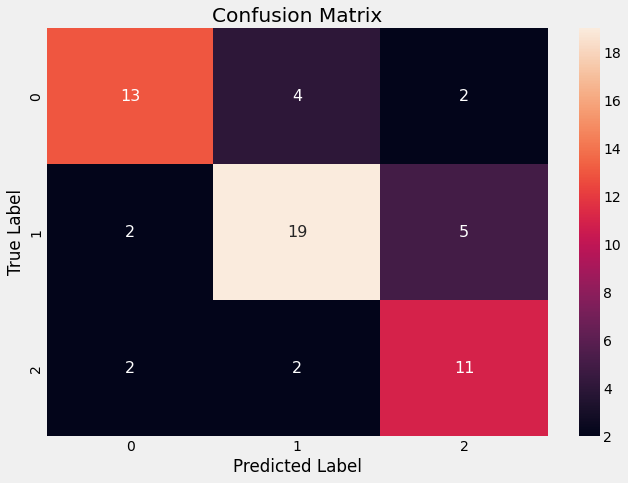

                    ---Classification Report---
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        19
           1       0.76      0.73      0.75        26
           2       0.61      0.73      0.67        15

    accuracy                           0.72        60
   macro avg       0.71      0.72      0.71        60
weighted avg       0.72      0.72      0.72        60



In [ ]:
emopred = emoji_model.predict(X_test) # predicting the X_test data
#emopred is predicted label of class, whereas y_test is the actual label
print("Accuracy :"+ str(accuracy_score(emopred,y_test)*100)) #calculating the accuracy score 
plot_confusion_matrix(y_test, emopred) #calling the confusion matrix function
print("                    ---Classification Report---")
print(classification_report(y_test, emopred)) # showing the classification report

##### Finding the good number of clusters for our datasets and classifying it finally storing it in a file for training in CNN

In [ ]:
df['text']

0      Why it's taking so long to get your product de...
1      Hey I please send my order details or the day ...
2                        Hey place send my order details
3                              Please send order details
4      Hello .. I’m using  your alpha arbutin during ...
                             ...                        
775                 Can i use this serum. For back acne?
776    Hey i have ordered granative retinoid for acne...
777           Can i use retinoid for acne pits and scars
778    After using it at night when to use Sunscreen....
779    @beminimalist__ hi after using this peel my sk...
Name: text, Length: 780, dtype: object

In [ ]:
#cleaning the text data using our cleaning functions 
"""Discription of map function and lambda function 
map function's syntax map(function,iterable) 
lambda function's syntax lambda x: statement 
where x is the parameter"""
TextData = map(lambda x: str(x).lower(),list(df['text'])) # converting all the text data into lower case 
TextData = map(remove_emoji,list(TextData)) #removing the emojis 
TextData = map(remove_url,list(TextData)) # removing the url
TextData = map(clean_text,list(TextData)) # removing punctuations and digits 
TextData = list(TextData) # finally casting the TextData map type to list datatype
TextData[:6] # Showing the first 6 comments for example

['why its taking long get your product delivered',
 'hey please send order details the day when received order',
 'hey place send order details',
 'please send order details',
 'hello i’m using your alpha arbutin during the day and vitamin ferulic serum during the night along with multipeptide serum can use retinol this',
 'which concentration retinol better for treating hyperpigmentation and dullness skin']

In [ ]:
tf_idf_vectorizor = TfidfVectorizer(stop_words='english',max_features=20000) #TFID Vectorizer's instance giving max features as 20000  
tf_idf = tf_idf_vectorizor.fit_transform(TextData) #fitting the data and trasnforming the data 
tf_idf_norm = normalize(tf_idf) #normalizing the data i.e converting the data inbetween 0 to 1
tf_idf_array = tf_idf_norm.toarray() #finally converting the data into array, so that it will be easy to perfom basic operations and pass into model
pd.DataFrame(tf_idf_array,columns=tf_idf_vectorizor.get_feature_names()).tail(3)#showing the features extracted from the comments

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,03q10,10niacinamide,10zinc,11serum,11th,14yr,15th,1718s,1yr,200ml,...,youre,yrs,zinc,zone,zualiray,ºâ,ºðÿ,âœ,ðÿ,œawesome
777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#writing all the necessary functions to perform clustering and find the good number of clusters
#Defining all the necessary functions in this class
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids

    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """ 
        
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self

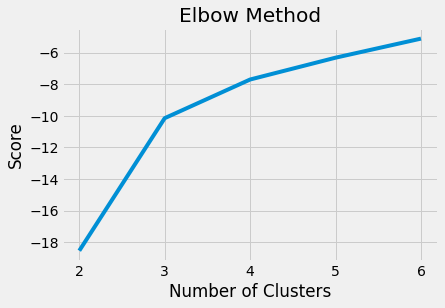

In [ ]:
sklearn_pca = PCA(n_components = 2) # creating instance for the PCA variable
#reducing the dimension of the data without losing it's information
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array) # now fitting and transforming the data 
number_clusters = range(2, 7) #giving the cluster limit as 2 to 6 (in range m to n-1)
#iterating 600 times and finding the good number of cluster and saving 
kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
#the scores are giving to the number of clusters respectively 
score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
#Plotting it to find the elbow 
plt.plot(number_clusters, score) 
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


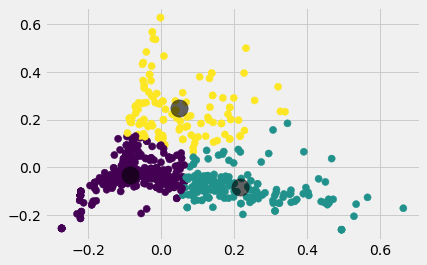

In [ ]:
#in the above graph the elbow is formed at 3.
#here we are clustering into 3 groups 
test_e = Kmeans(3, 1, 600) #using the Kmeans class and passing k as 3 ,seed as 1 and max_iter as 600
fitted = test_e.fit_kmeans(Y_sklearn) #using the fit_kmeans function in Kmeans class 
predicted_values = test_e.predict(Y_sklearn) #now predicting the classes
#scatter ploting the data 
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')
#fitting the centroids in the graph
centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);


In [ ]:
#defining function to get the top features of the cluster
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, predicted_values, 15) 


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#top 15 words in each clusters
#this not only indicates negative and possitive but there are selling and buying pitches in the instagram comments 
dfs = get_top_features_cluster(tf_idf_array, predicted_values, 15)
dfs

[        features     score
 0          order  0.030479
 1   beminimalist  0.027686
 2             ðÿ  0.025870
 3          check  0.024186
 4          price  0.023072
 5           body  0.022048
 6      sunscreen  0.021568
 7          using  0.020922
 8           face  0.020513
 9        product  0.020414
 10           hey  0.020068
 11          love  0.015500
 12         apply  0.014937
 13           use  0.014735
 14          used  0.014434,         features     score
 0            use  0.203161
 1          serum  0.135559
 2        vitamin  0.101831
 3           acid  0.079464
 4    niacinamide  0.067311
 5        retinol  0.059018
 6          toner  0.048502
 7            vit  0.045340
 8          alpha  0.043602
 9        arbutin  0.041306
 10     salicylic  0.040934
 11       routine  0.036349
 12         using  0.033867
 13    hyaluronic  0.033336
 14  beminimalist  0.032307,      features     score
 0        skin  0.240524
 1        oily  0.105302
 2        acne  0.083637
 3  

Supervising the Data and storing as CSV

In [ ]:
spvsdData = pd.DataFrame({'text':TextData,'class':predicted_values})#forming a dataframe that respectively assigns the value
spvsdData.to_csv('FinalData.csv')#saving the dataframe as csv

In [ ]:
spvsdData

,text,class
0,why its taking long get your product delivered,0
1,hey please send order details the day when rec...,0
2,hey place send order details,0
3,please send order details,0
4,hello i’m using your alpha arbutin during the ...,1
...,...,...
775,can use this serum for back acne,1
776,hey have ordered granative retinoid for acne p...,0
777,can use retinoid for acne pits and scars,0
778,after using night when use sunscreen whats the...,0


##### Text classification CNN model Training

In [ ]:
train_data = pd.read_csv("/content/FinalData.csv") #loading the dataset that we have saved
train_data.dropna(axis = 0, how ='any',inplace=True) #dropping the nan values or None value of columns
train_data['Num_words_text'] = train_data['text'].apply(lambda x:len(str(x).split())) 
"""in the above line we are creating a new column and filling the count of the words in that commnet""" 
mask = train_data['Num_words_text'] >2 # creating a condintion mask that all the count of words must be greater than 2
train_data = train_data[mask] # applying the mask so that only True statemnets will stay in the dataframe
print('-------Train data--------')
print(train_data['class'].value_counts()) # counting the values of class i.e number of each classes
print(len(train_data)) # printing the length of train_data
print('-------------------------')
max_train_sentence_length  = train_data['Num_words_text'].max() #getting the maxium number of words present, from the comments
#applying all the three text cleaning function in the below three lines to the text data
train_data['text'] = train_data['text'].apply(remove_emoji)
train_data['text'] = train_data['text'].apply(remove_url)
train_data['text'] = train_data['text'].apply(clean_text)
#Test Data
test_data= pd.read_csv("/content/FinalData.csv") #loading the FinalData.csv into test_data variable
test_data.dropna(axis = 0, how ='any',inplace=True)  ##dropping the nan values or None value of columns
test_data['Num_words_text'] = test_data['text'].apply(lambda x:len(str(x).split())) 
"""in the above line we are creating a new column and filling the count of the words in that commnet""" 
#repeating the similar steps that was performed for train_data
max_test_sentence_length  = test_data['Num_words_text'].max()

mask = test_data['Num_words_text'] >2
test_data = test_data[mask]

print('-------Test data--------')
print(test_data['class'].value_counts())
print(len(test_data))
print('-------------------------')

test_data['text'] = test_data['text'].apply(remove_emoji)
test_data['text'] = test_data['text'].apply(remove_url)
test_data['text'] = test_data['text'].apply(clean_text)
#printing the maximum number of words present in the comments
print('Train Max Sentence Length :'+str(max_train_sentence_length))
print('Test Max Sentence Length :'+str(max_test_sentence_length))

-------Train data--------
0    393
1    167
2    120
Name: class, dtype: int64
680
-------------------------
-------Test data--------
0    393
1    167
2    120
Name: class, dtype: int64
680
-------------------------
Train Max Sentence Length :92
Test Max Sentence Length :92


In [ ]:
#tokenizing the data 
num_words = 20000 #it is the maximum feature extraction 
tokenizer = Tokenizer(num_words=num_words, oov_token="unk") #creating instance for Tokenizer
tokenizer.fit_on_texts(train_data['text'].tolist()) #fitting the data to our cleaned text data
#Splitting the data into training and testing data
X_train, X_valid, y_train, y_valid = train_test_split(train_data['text'].tolist(),\
                                                      train_data['class'].tolist(),\
                                                      test_size=0.1,\
                                                      stratify = train_data['class'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train))) #length of the training data
print('Class distribution'+str(Counter(y_train))) #length of the lables for training data
print('Valid data len:'+str(len(X_valid))) #lenght of testing data
print('Class distribution'+ str(Counter(y_valid))) #length of testing data's label
"""after tokenization converting the text into sequences of number because we need to pass them into convelutional one dimensional network
 """
x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(test_data['text'].tolist()) )

"""converting them into pad sequences so that the matrix will be balanced 
Example: [[1], [2, 3], [4, 5, 6]] - before pad sequence 
after pad sequence :
[[0,0,1]
[0,2,3]
[4,5,6]]
"""
x_train = pad_sequences(x_train, padding='post', maxlen=40)
x_valid = pad_sequences(x_valid, padding='post', maxlen=40)
x_test = pad_sequences(x_test, padding='post', maxlen=40)

#creating label encoder to preprocess the data and encode the data
le = LabelEncoder()

train_labels = le.fit_transform(y_train)#fitting and transforming the data 
"""Example for to_categorical before and after 
Before performing to_categorical [0, 1, 2, 3]
after performing to_categorical 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] """
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
valid_labels = le.transform(y_valid)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

test_labels = le.transform(test_data['class'].tolist())#transforming the data using the label encoder isntance
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels)) #performing to_categorical method on test_labels
list(le.classes_)#viewing the classes 

#converting the dataset into tensor products or say in a way tensor flow understands
train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))



Train data len:612
Class distributionCounter({0: 354, 1: 150, 2: 108})
Valid data len:68
Class distributionCounter({0: 39, 1: 17, 2: 12})


<ipython-input-30-341f82ea9c48>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array( tokenizer.texts_to_sequences(X_train) )
<ipython-input-30-341f82ea9c48>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
<ipython-input-30-341f82ea9c48>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=objec

In [ ]:
"""Viewing the Train, Validation, and Test data's Tensor representation"""
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==3:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==3:
        break
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==3:
        break  

======Train dataset ====
tf.Tensor(
[  4 587 588   2   4 589 590 591  17   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0], shape=(40,), dtype=int32) tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)
tf.Tensor(
[ 10  46   7   2 191  12  32  47  56  13   8   2 176  49   8   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0], shape=(40,), dtype=int32) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor(
[  90   51  190   88    3   61   48   43 1192  217    4  246  260    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0], shape=(40,), dtype=int32) tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)
======Validation dataset ====
tf.Tensor(
[1085 1086 1087  670    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0

##### Training The CNN Model and Evaluation of this model

In [ ]:
max_features =20000
embedding_dim =64
sequence_length = 40

model = tf.keras.Sequential() #Sequential groups a linear stack of layers into a tf.keras.Model 
#to understand more about Sequential refer https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005)))  #Turns positive integers (indexes) into dense vectors of fixed size. 
#to know more about Embedding and its parameters refer https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding                                   

model.add(tf.keras.layers.Conv1D(128,3, activation='relu',\
                                 kernel_regularizer = regularizers.l2(0.0005),\
                                 bias_regularizer = regularizers.l2(0.0005))) #1D convolution layer (e.g. temporal convolution), refer https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D                              


model.add(tf.keras.layers.GlobalMaxPooling1D()) # Global max pooling operation for 1D temporal data.
"""The Dropout layer randomly sets input units to 0 with a frequency of rate(its parameter) at each step during training time, which helps prevent overfitting. 
Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged."""
model.add(tf.keras.layers.Dropout(0.5))
"""Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as 
the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True). 
These are all attributes of Dense."""
model.add(tf.keras.layers.Dense(3, activation='sigmoid',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
                               



model.summary()#viewing the summary of our model
#compiling our model with loss as Categorical Cross Entropy and optimizer Nadam
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 64)            1280064   
                                                                 
 conv1d (Conv1D)             (None, 38, 128)           24704     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 1,305,155
Trainable params: 1,305,155
Non-trainable params: 0
______________________________________________

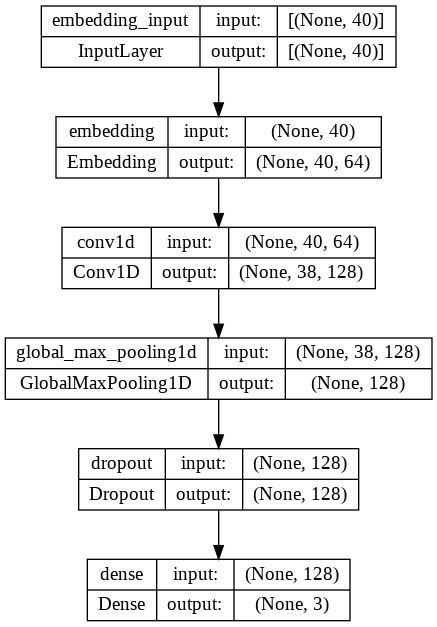

In [ ]:
#getting the architecture image for our model 
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
epochs = 100                                                                     
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs)
history = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128), 
                    verbose=1)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 2s 160ms/step - loss: 1.6097 - categorical_accuracy: 0.4199 - val_loss: 1.5181 - val_categorical_accuracy: 0.5735
Epoch 2/100
5/5 [==============================] - 0s 82ms/step - loss: 1.4656 - categorical_accuracy: 0.5621 - val_loss: 1.3906 - val_categorical_accuracy: 0.5735
Epoch 3/100
5/5 [==============================] - 0s 82ms/step - loss: 1.3318 - categorical_accuracy: 0.5801 - val_loss: 1.2745 - val_categorical_accuracy: 0.5735
Epoch 4/100
5/5 [==============================] - 0s 87ms/step - loss: 1.2201 - categorical_accuracy: 0.5784 - val_loss: 1.1798 - val_categorical_accuracy: 0.5735
Epoch 5/100
5/5 [==============================] - 0s 60ms/step - loss: 1.1311 - categorical_accuracy: 0.5784 - val_loss: 1.1016 - val_categorical_accuracy: 0.5735
Epoch 6/100
5/5 [==============================] - 0s 59ms/step - loss: 1.0474 - categorical_accuracy: 0.5784 - val_loss: 1.0308 - val_categorical_accuracy: 0.5735
Epoch 7/100
5/5 [==========

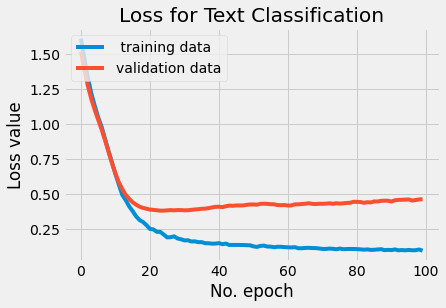

In [ ]:
#ploting the loss over the epoch
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

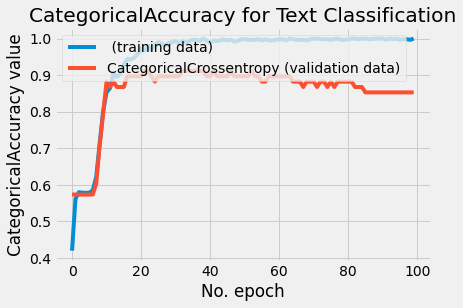

In [ ]:
#plotting the Categorica Accuracy for validation and training data
plt.plot(history.history['categorical_accuracy'], label=' (training data)')
plt.plot(history.history['val_categorical_accuracy'], label='CategoricalCrossentropy (validation data)')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model")
#loading our model
json_file = open('./model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5") 
#loading the Sentimental analysis model  
from tensorflow.keras.models import model_from_json
json_file_senti = open('./smodel.json', 'r')
loaded_model_json_senti = json_file_senti.read()
json_file_senti.close()
loaded_model_senti = model_from_json(loaded_model_json_senti)
# load weights into new model
loaded_model_senti.load_weights("smodel.h5")

Saved model


In [ ]:
print("Generate predictions for all samples")
predictions = loaded_model.predict(x_test) #predicting the test data
predict_results = predictions.argmax(axis=1) #returning the max element of the array in a paricular axis
test_data['pred_sentiment']= predict_results #creating a new column called pred_sentiment
#assigning the classes respectively
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment == 0),'class_1',test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment == '1'),'class_2',test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment == '2'),'class_3',test_data.pred_sentiment)
#showing the value counts of classes
test_data['pred_sentiment'].value_counts()
test_data.to_csv("outputCNN.csv") #saving the dataframe with output as outputCNN.csv

Generate predictions for all samples
22/22 [==============================] - 0s 4ms/step


3/3 [==============================] - 0s 5ms/step


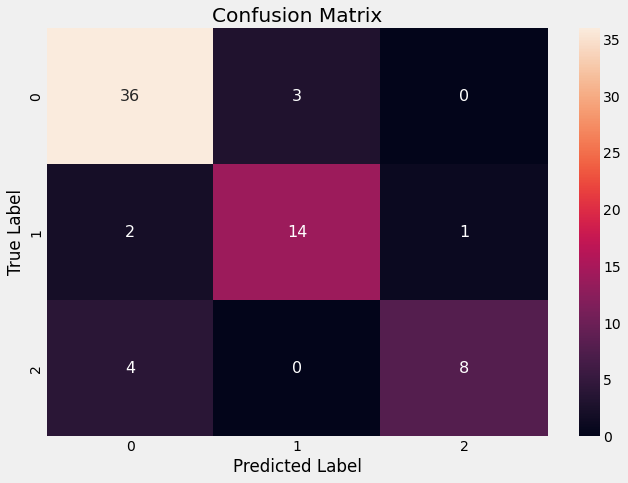

None
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        39
           1       0.82      0.82      0.82        17
           2       0.89      0.67      0.76        12

    accuracy                           0.85        68
   macro avg       0.86      0.80      0.82        68
weighted avg       0.85      0.85      0.85        68



In [ ]:
#evaluating using confusion matrix and classification report
predCNN = loaded_model.predict(x_valid)
predCNN = predCNN.argmax(axis=1)
print(plot_confusion_matrix(y_valid,predCNN))
print(classification_report(y_valid,predCNN))

##### Recommender System

In [ ]:
#This funciton takes in an emoji and classifies it's category 
def emoji_clf(emoji):
    em = str(emoji)
    temp = pyemoji.entities(em)[2:-1]#preprocessing the emoji into decimal 
    x = len(re.findall('[0-9]+', temp))#using pattern to find digits
    if x >0: #writing some base conditions for not getting error or empty values
        arr = np.array(float(temp)).reshape(-1,1)
        predicted = emoji_model.predict(arr)
        return list(predicted)
#Extracts emojis from a string 
def extract_emojis(s):
    t = len(emojis.get(s)) #emojis is a library that is being imported
    if t != 0 :
        return s
    else: 
        pass
#This takes  a real time dataframe and predicts the output using the model
#in this funciton all the steps are alredy commented while training the CNN model it's a similar preprocessing methods used here
def CNN_preprocess_and_predict(datafile): 
    global test_datars
    test_datars = datafile
    test_datars.dropna(axis = 0, how ='any',inplace=True) 
    test_datars['Num_words_text'] = test_datars['text'].apply(lambda x:len(str(x).split())) 
    max_test_sentence_length  = test_datars['Num_words_text'].max()

    mask = test_datars['Num_words_text'] >2
    test_datars = test_datars[mask]
    test_datars['text'] = test_datars['text'].apply(remove_emoji)
    test_datars['text'] = test_datars['text'].apply(remove_url)
    test_datars['text'] = test_datars['text'].apply(clean_text)

    num_words = 20000 
    tokenizerrs = Tokenizer(num_words=num_words, oov_token="unk") 
    tokenizerrs.fit_on_texts(test_datars['text'].tolist()) 

    realdata  = np.array( tokenizerrs.texts_to_sequences(test_datars['text'].tolist()) )
    realdata = pad_sequences(realdata, padding='post', maxlen=40) 
    print("Generate predictions for all samples")
    predstate= tf.convert_to_tensor(realdata,dtype=tf.int64)
    predictions = loaded_model.predict(predstate) 
    predictions_senti = loaded_model_senti.predict(predstate)
    predict_results = predictions.argmax(axis=1) 
    predict_results_senti = predictions_senti.argmaz(axis=1)

    test_datars['pred_sentiment']= predict_results
    test_datars['pred_sentiment'] = np.where((test_datars.pred_sentiment == 0),'class1',test_datars.pred_sentiment)
    test_datars['pred_sentiment'] = np.where((test_datars.pred_sentiment == '1'),'class2',test_datars.pred_sentiment)
    test_datars['pred_sentiment'] = np.where((test_datars.pred_sentiment == '2'),'class3',test_datars.pred_sentiment) 

    test_datars['pred_sentiment_senti']= predict_results_senti
    test_datars['pred_sentiment_senti'] = np.where((test_datars.pred_sentiment_senti == 0),'negative',test_datars.pred_sentiment_senti)
    test_datars['pred_sentiment_senti'] = np.where((test_datars.pred_sentiment_senti == '1'),'neutral',test_datars.pred_sentiment_senti)
    test_datars['pred_sentiment_senti'] = np.where((test_datars.pred_sentiment+senti == '2'),'positive',test_datars.pred_sentiment_senti) 





In [ ]:
calc_copy = pd.read_csv("/content/Post1and2.csv") #creating a copy of our realtime dataset
CNN_preprocess_and_predict(calc)#calling the function to predict the cleasses
test_datars.to_csv("classOfRealData.csv")#saving the results
imagepath = "/content/Post1_1.jpg"#loading the real time image into imagepath variable

Generate predictions for all samples
2/2 [==============================] - 0s 7ms/step


<ipython-input-41-fcea4725912b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_datars['text'] = test_datars['text'].apply(remove_emoji)
<ipython-input-41-fcea4725912b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_datars['text'] = test_datars['text'].apply(remove_url)
<ipython-input-41-fcea4725912b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [ ]:
#this is our recommender system function which combines every functions and gives output
def recommender_system(filedata,image): 
    #defining global variables to make it accesible out of local scope
    global emojiS,emofil, q,l,emoji_classes
    
    
    txt_data = filedata[['likesCount','text']].dropna() # droping None values from filedata dataframe
    l = int(txt_data['likesCount'].sum()) #calculating the number of total likes 
    print("No. of Likes: ",l)
    c = int(len(filedata['text'])) # calculating the total number of comments
    print("No. of Commontes: ",c)
    emojiS = emoji_extractor("".join(list(filedata['text']))) # extracting emojis form all the comments and storing into list
    e = int(len(emojiS)) #calculating the total number of emojis
    print("No. of emojis: ",e)
    q = ImageQuality_assement(str(image)) #evaluvating the quality of picture
    print("ImageQuality: ",q)
    Wt = classifier(l,c,e,q) #passing the values to our estimator function
    print("No. of Sales Estimated (Wt): ",Wt) 
    
    #preprocessing the text and emojis so that we can predict the classes of emojis
    temp = list(map(extract_emojis,emojiS))
    
    emofil = [i for i in temp if i is not None]#removing None values from temp list
    
    emoji_classes = np.array(list(map(emoji_clf,emofil)),ndmin=1)#classifying the emojis
    emoji_classes = list(emoji_classes.flatten())#converting into one dimention array
    #showing the counts of all three classes of emojis
    print("Positive Emoji Count: ",emoji_classes.count([1]))
    print("negative Emoji Count: ",emoji_classes.count([2]))
    print("neutral Emoji Count: ",emoji_classes.count([0]))
    print()
    print() 
    print("The text Classification Report")
    print()
    print(test_datars['pred_sentiment'].value_counts())
    
    m = max(test_datars['pred_sentiment'])
    print("The Maximum Class's output is: ",m)

    print("Suggestions") 
    if q == 'poor':
        print("Need to improve image quality about by 50%")
    elif q == 'medium': 
        print("Need to improve image quality by 30%")
    elif q =='high':
        form = round(int(c/3)) 
        if int(emoji_classes.count([2])) <= form:
            print("suggested to improve the quality of the product")
        elif int(emoji_classes.count([1])) <= form: 
            print("Good review overall, stay consistent and provide Quality Product")
        elif int(emoji_classes.count([0])) <= form:
            print("Improve the quality of the product a bit more")
    
    

    
    
    
    
    

In [ ]:
#Final Output of the recomender System
output=recommender_system(calc_copy[:163],imagepath) 
print(output)
#Final Output of the recomender System
output2=recommender_system(calc_copy[163:],imagepath) 
print(output2)

No. of Likes:  13
No. of Commontes:  163
No. of emojis:  28
ImageQuality:  high
No. of Sales Estimated (Wt):  21
Positive Emoji Count:  2
negative Emoji Count:  2
neutral Emoji Count:  2


The text Classification Report

class1    18
class3     9
class2     6
Name: pred_sentiment, dtype: int64
The Maximum Class's output is:  class3
Suggestions
suggested to improve the quality of the product
None
No. of Likes:  25
No. of Commontes:  163
No. of emojis:  18
ImageQuality:  high
No. of Sales Estimated (Wt):  30
Positive Emoji Count:  1
negative Emoji Count:  2
neutral Emoji Count:  3


The text Classification Report

class1    18
class3     9
class2     6
Name: pred_sentiment, dtype: int64
The Maximum Class's output is:  class3
Suggestions
suggested to improve the quality of the product
None


<ipython-input-43-6c2a28731b14>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  emoji_classes = np.array(list(map(emoji_clf,emofil)),ndmin=1)#classifying the emojis


### All necessary funcitons Output 

In [ ]:
#defining test data
test_str = "hey lana, 36 age'. 😆how are you😄 https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense"
test_emo = "😆" 
#testing function
print("1. text_extractor output: ")
a = text_extractor(test_str)
print(a)
print()
print("2. Emoji_extractor output: ")
b = emoji_extractor(test_str)
print(b)
print()
print("3. ImageQuality_assement output: ")
c = ImageQuality_assement(imagepath)
print(c)
print() 
print("4. classifier output:")
d = classifier(38,326,46,'high')
print(d)
print()
print("5. remove_emoji output:")
e = remove_emoji(test_str)
print(e)
print()
print("6. remove_url output:") 
f = remove_url(str(e))
print(f)
print()
print("7. clean_text output:")
g = clean_text(str(f))
print(g)
print()
print("8. emoji_clf output: ")
h = emoji_clf(test_emo)
print(h)
print()
print("9. extract_emojis output:")
i = extract_emojis(test_str)
print(i)
print()

1. text_extractor output: 
hey lana, 36 age'. how are you https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

2. Emoji_extractor output: 
['😆', '😄']

3. ImageQuality_assement output: 
high

4. classifier output:
45

5. remove_emoji output:
hey lana, 36 age'. how are you https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

6. remove_url output:
hey lana, 36 age'. how are you 

7. clean_text output:
hey lana age how are you

8. emoji_clf output: 
[1]

9. extract_emojis output:
hey lana, 36 age'. 😆how are you😄 https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense



In [ ]:
print("-----------Welcome to recommender system----------")
comment = input("Enter the file name (i.e) the comments: ")
comment = pd.read_csv(str(comment))
image = input("Enter the image file name here: ")
image = str(image)
try:
   output=recommender_system(comment,image)
   print(output)
except:
   print("An exception occurred can you check wether you've given correct path or file name") 

-----------Welcome to recommender system----------
Enter the file name (i.e) the comments: Post1and2.csv
Enter the image file name here: Post1_1.jpg
No. of Likes:  38
No. of Commontes:  326
No. of emojis:  46
ImageQuality:  high
No. of Sales Estimated (Wt):  45
Positive Emoji Count:  3
negative Emoji Count:  4
neutral Emoji Count:  5


The text Classification Report

class1    18
class3     9
class2     6
Name: pred_sentiment, dtype: int64
The Maximum Class's output is:  class3
Suggestions
suggested to improve the quality of the product
None


<ipython-input-43-6c2a28731b14>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  emoji_classes = np.array(list(map(emoji_clf,emofil)),ndmin=1)#classifying the emojis
